### Importing the dataset and cleaning the data

In [110]:
import numpy as np
import pandas as pd

In [111]:
df = pd.read_csv("automobile.csv")

In [112]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

In [114]:
df.replace("?",np.nan,inplace=True)

In [115]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

#### removing columns with higher null values

In [116]:
threshold=0.8
df = df[df.columns[df.isnull().mean() < threshold]]
df.head(3)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,NaN,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,NaN,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500


replacing nan values with mean values

In [117]:
cols = ["symboling","normalized-losses","wheel-base","length","width","height","curb-weight","engine-size","bore","stroke",
          "compression-ratio","horsepower","peak-rpm","city-mpg","highway-mpg","price"]

In [118]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy="mean")
imputer.fit(df[cols])
df[cols]= imputer.transform(df[cols])

In [119]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [120]:
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [121]:
df.dropna(axis=0,subset=["num-of-doors"],inplace=True)
df.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [122]:
#normalizing the length, width, height
df["length"] = df["length"]/df["length"].max()
df["width"] = df["width"]/df["width"].max()
df["height"] = df["height"]/df["height"].max()

### importing visualization library to check dependency of columns

In [123]:
import seaborn as sns

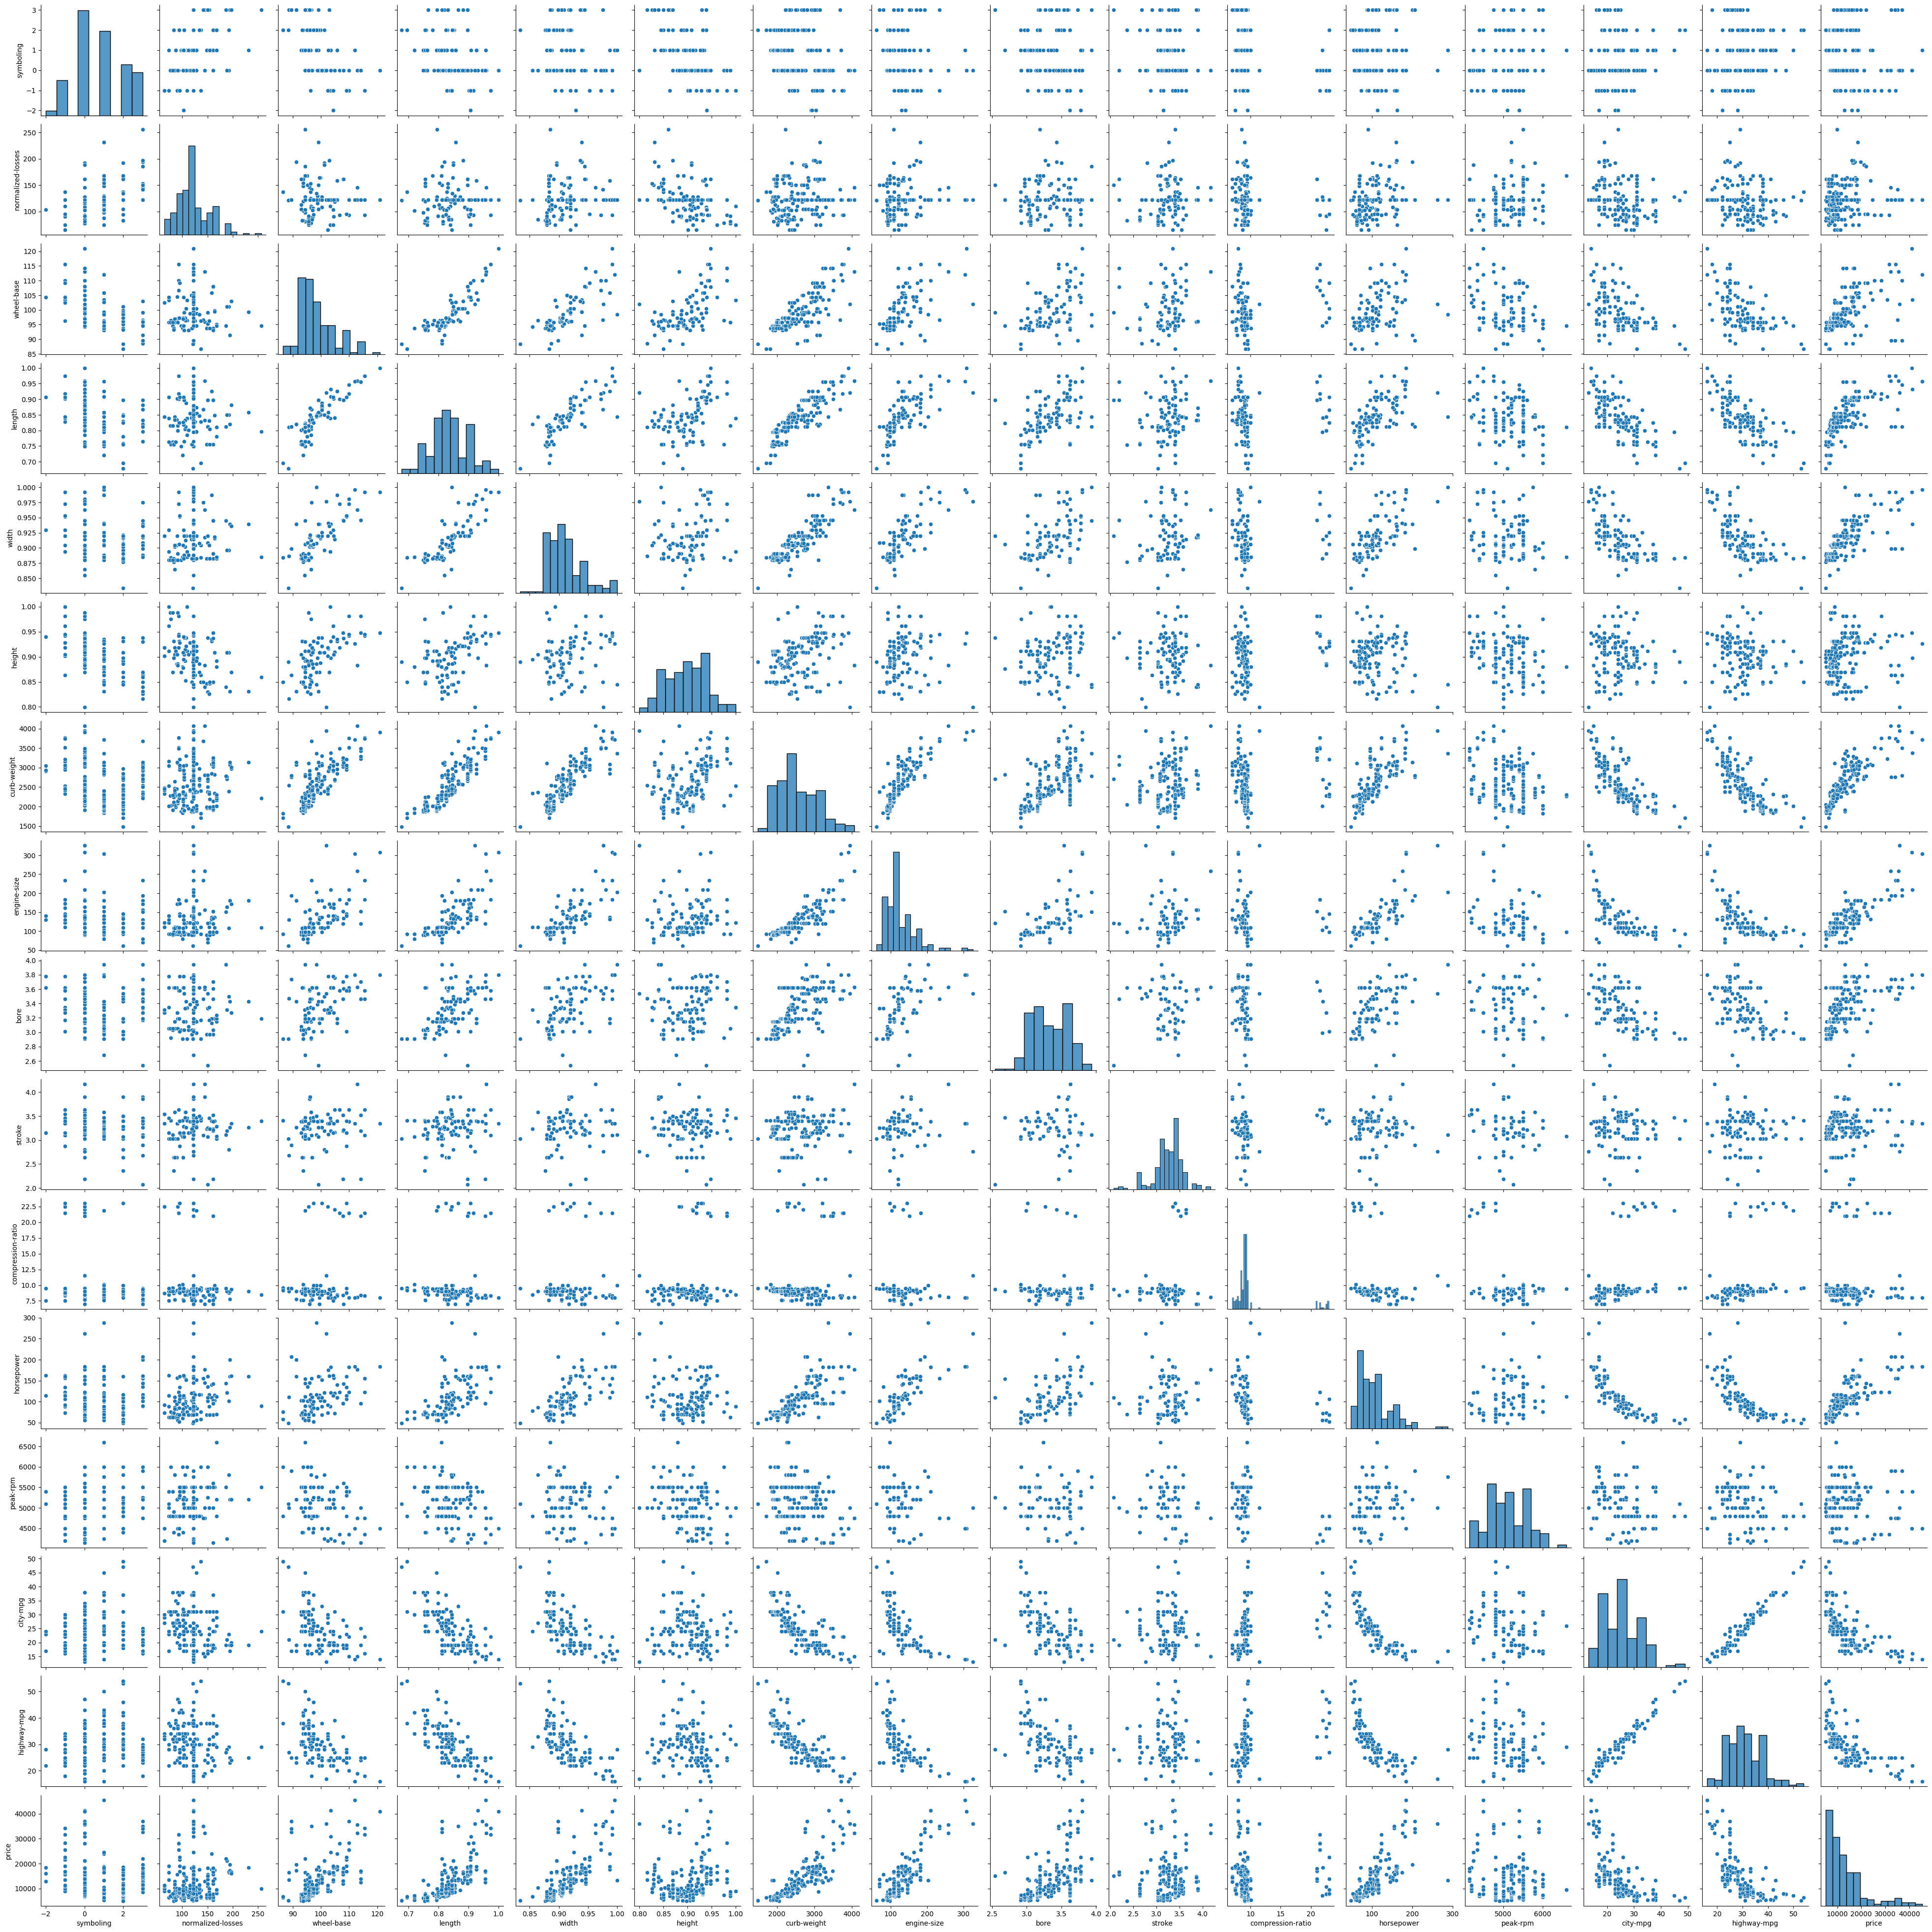

In [125]:
sns.pairplot(df)

In [124]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [126]:
df.dtypes

symboling            float64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight          float64
engine-type           object
num-of-cylinders      object
engine-size          float64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg             float64
highway-mpg          float64
price                float64
dtype: object

In [83]:
#col = ["fuel-type","body-style","drive-wheels","engine-location"]

In [84]:
df.head(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,13495.0
1,3.0,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130.0,mpfi,3.47,2.68,9.0,111.0,5000.0,21.0,27.0,16500.0
2,1.0,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152.0,mpfi,2.68,3.47,9.0,154.0,5000.0,19.0,26.0,16500.0
3,2.0,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109.0,mpfi,3.19,3.40,10.0,102.0,5500.0,24.0,30.0,13950.0
4,2.0,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136.0,mpfi,3.19,3.40,8.0,115.0,5500.0,18.0,22.0,17450.0


In [85]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder',OneHotEncoder(),['aspiration','num-of-doors',
                                                                 'drive-wheels','fuel-type','make',
                                                                 'body-style','engine-location',
                                                                 'num-of-cylinders','engine-type','num-of-cylinders',
                                                                'fuel-system'])],remainder='passthrough')
dt1 = np.array(ct.fit_transform(df))

In [109]:
list(dt1[0:1,:])

[array([0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 122.0, 'std', 'two', 'rwd', 88.6,
        168.8, 64.1, 48.8, 2548.0, 'dohc', 'four', 130.0, 'mpfi', 3.47,
        2.68, 9.0, 111.0, 5000.0, 21.0, 27.0, 13495.0], dtype=object)]

In [86]:
print(dt1)

[[0.0 1.0 1.0 ... 21.0 27.0 13495.0]
 [0.0 1.0 1.0 ... 21.0 27.0 16500.0]
 [0.0 1.0 1.0 ... 19.0 26.0 16500.0]
 ...
 [0.0 1.0 0.0 ... 18.0 23.0 21485.0]
 [1.0 0.0 0.0 ... 26.0 27.0 22470.0]
 [0.0 1.0 0.0 ... 19.0 25.0 22625.0]]


In [90]:
type(dt1)


numpy.ndarray

In [98]:
dt1[:,0:-1]

array([[0.0, 1.0, 1.0, ..., 5000.0, 21.0, 27.0],
       [0.0, 1.0, 1.0, ..., 5000.0, 21.0, 27.0],
       [0.0, 1.0, 1.0, ..., 5000.0, 19.0, 26.0],
       ...,
       [0.0, 1.0, 0.0, ..., 5500.0, 18.0, 23.0],
       [1.0, 0.0, 0.0, ..., 4800.0, 26.0, 27.0],
       [0.0, 1.0, 0.0, ..., 5400.0, 19.0, 25.0]], dtype=object)

In [102]:
dt1[:,-1]

array([13495.0, 16500.0, 16500.0, 13950.0, 17450.0, 15250.0, 17710.0,
       18920.0, 23875.0, 13207.129353233831, 16430.0, 16925.0, 20970.0,
       21105.0, 24565.0, 30760.0, 41315.0, 36880.0, 5151.0, 6295.0,
       6575.0, 5572.0, 6377.0, 7957.0, 6229.0, 6692.0, 7609.0, 8921.0,
       12964.0, 6479.0, 6855.0, 5399.0, 6529.0, 7129.0, 7295.0, 7295.0,
       7895.0, 9095.0, 8845.0, 10295.0, 12945.0, 10345.0, 6785.0,
       13207.129353233831, 13207.129353233831, 11048.0, 32250.0, 35550.0,
       36000.0, 5195.0, 6095.0, 6795.0, 6695.0, 7395.0, 10945.0, 11845.0,
       13645.0, 15645.0, 8845.0, 8495.0, 10595.0, 10245.0, 11245.0,
       18280.0, 18344.0, 25552.0, 28248.0, 28176.0, 31600.0, 34184.0,
       35056.0, 40960.0, 45400.0, 16503.0, 5389.0, 6189.0, 6669.0, 7689.0,
       9959.0, 8499.0, 12629.0, 14869.0, 14489.0, 6989.0, 8189.0, 9279.0,
       9279.0, 5499.0, 7099.0, 6649.0, 6849.0, 7349.0, 7299.0, 7799.0,
       7499.0, 7999.0, 8249.0, 8949.0, 9549.0, 13499.0, 14399.0, 13499.0,
 

In [105]:
dt1.dtype

dtype('O')

In [108]:
list(dt1[0:1,:])

[array([0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
        0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0,
        0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 122.0, 'std', 'two', 'rwd', 88.6,
        168.8, 64.1, 48.8, 2548.0, 'dohc', 'four', 130.0, 'mpfi', 3.47,
        2.68, 9.0, 111.0, 5000.0, 21.0, 27.0, 13495.0], dtype=object)]